<a href="https://colab.research.google.com/github/llealgt/differential_equations/blob/master/LagrangeMult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lagrange multipliers for constrained optimization

In [0]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt


## Problem 1

In [0]:
# First we define the functions,
def f (x, y) :
    return np.exp(-(2*x*x + y*y - x*y) / 2)

def g (x, y) :
    return x*x + 3*(y+1)**2 - 1

# Next their derivatives,
def dfdx (x, y) :
    return 1/2 * (-4*x + y) * f(x, y)

def dfdy (x, y) :
    return 1/2 * (x - 2*y) * f(x, y)

def dgdx (x, y) :
    return 2*x

def dgdy (x, y) :
    return 6*(y+1)

In [0]:
def plot_contour_plot(function,x_plot_range=(0,100,100),y_plot_range=(0,100,100)):
  x_list = np.linspace(*x_plot_range)
  y_list = np.linspace(*y_plot_range)

  X1,X2 = np.meshgrid(x_list,y_list)

  Y = function(X1,X2)

  fig,ax = plt.subplots(1,1)
  cp = plt.contourf(X1,X2,Y)
  fig.colorbar(cp)
  plt.show()

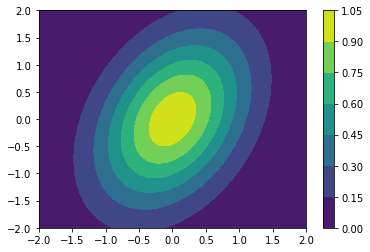

In [14]:
plot_contour_plot(f,x_plot_range=(-2,2,100),y_plot_range=(-2,2,100))

In [4]:
def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

(x0, y0, λ0) = (1, -1.5, 0)
x, y, λ = optimize.root(DL, [x0, y0, λ0]).x
print("x = %g" % x)
print("y = %g" % y)
print("λ = %g" % λ)

x = 0.930942
y = -1.21083
λ = -0.152319


## Problem 2

In [0]:
# First we define the functions, YOU SHOULD IMPLEMENT THESE
def f (x, y) :
    return -np.exp(x - np.power(y,2) + x*y)

def g (x, y) :
    return np.cosh(y) +x - 2

# Next their derivatives, YOU SHOULD IMPLEMENT THESE
def dfdx (x, y) :
    return (-np.exp(x - np.power(y,2) +x*y))*(1 + y)

def dfdy (x, y) :
    return (-np.exp(x - np.power(y,2) + x*y))*(-2*y + x)

def dgdx (x, y) :
    return 1

def dgdy (x, y) :
    return np.sinh(y)

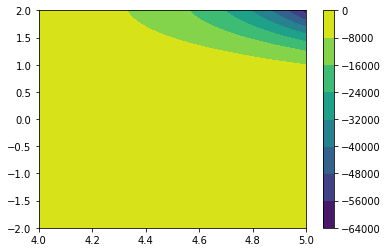

In [50]:
plot_contour_plot(f,x_plot_range=(4,5,100),y_plot_range=(-2,2,100))

In [16]:

def DL (xyλ) :
    [x, y, λ] = xyλ
    return np.array([
            dfdx(x, y) - λ * dgdx(x, y),
            dfdy(x, y) - λ * dgdy(x, y),
            - g(x, y)
        ])

# To score on this question, the code above should set
# the variables x, y, λ, to the values which solve the
# Langrange multiplier problem.

# I.e. use the optimize.root method, as you did previously.

x, y, λ = optimize.root(DL,[0,0,0]).x

print("x = %g" % x)
print("y = %g" % y)
print("λ = %g" % λ)
print("f(x, y) = %g" % f(x, y))

x = 0.957782
y = 0.289565
λ = -4.07789
f(x, y) = -3.16222
